In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import sklearn

---
# Classifying handwritten digits

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png)

## Load the data

---

- There are 1797 images of handwritten digits of 8x8 pixels each    
- The dataset has 1797 rows and 64 columns
    - Each row is an image, each column is a pixel

<br>

In [5]:
from sklearn import datasets
digits = datasets.load_digits()

print(digits.keys())
print(digits.images.shape)
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


<br> 

---
## Inspect the data

- An 8x8 pixel image can be displayed using matplotlib's `imshow`

<br>

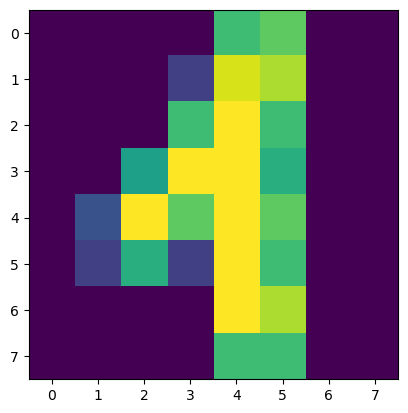

In [31]:
plt.imshow(digits.images[200]);

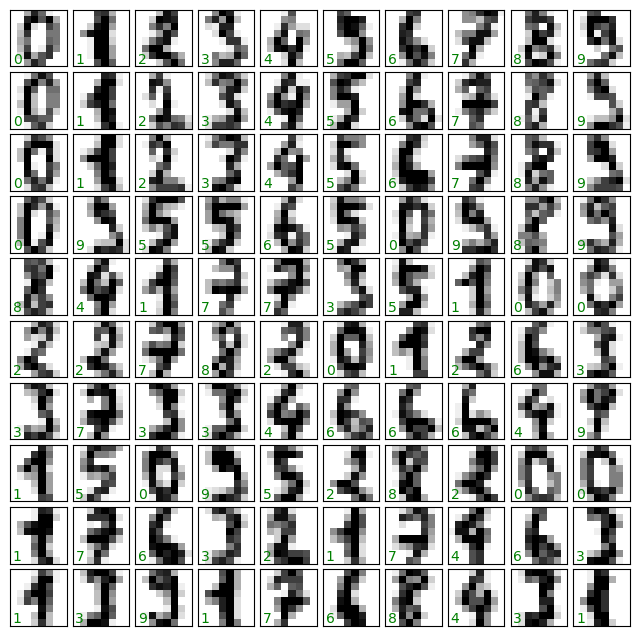

In [7]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [35]:
digits_df = pd.DataFrame(digits.data,
                         index=[f"Image_{x}" for x in range(1797)],
                         columns=["Pixel_" + str(i) for i in range(64)])

In [36]:
digits_df[:5]

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_54,Pixel_55,Pixel_56,Pixel_57,Pixel_58,Pixel_59,Pixel_60,Pixel_61,Pixel_62,Pixel_63
Image_0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
Image_1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
Image_2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
Image_3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
Image_4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


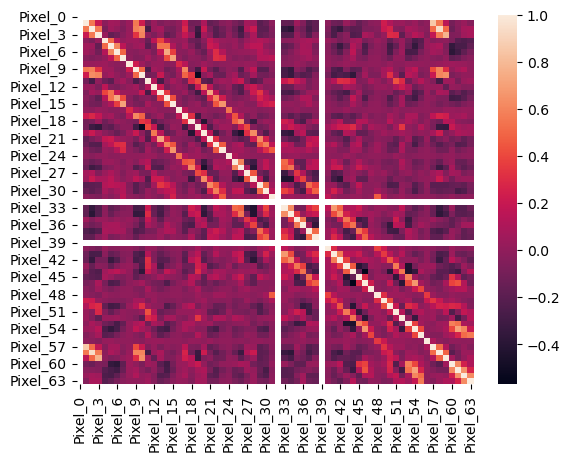

In [10]:
sns.heatmap(digits_df.corr());

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [38]:
# The Dependent Variable

import numpy as np
np.unique(digits.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### This is a Multiclass Classification Problem since the Dependent Variable has 10 classes

## Visualize the Classification Boundary using PCA

In [13]:
from sklearn.preprocessing import StandardScaler
X_digits = StandardScaler().fit_transform(digits.data)

In [41]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
data_2comp = pca_2.fit_transform(X_digits)

In [42]:
pca_2.explained_variance_ratio_.sum()

0.21594970500832789

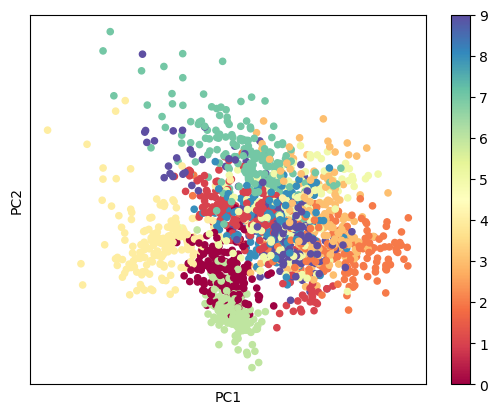

In [16]:
pd.DataFrame(data_2comp, 
          columns=['PC1', 'PC2']).plot.scatter(x='PC1', y='PC2', 
                                               c=digits.target, cmap='Spectral', 
                                               xticks=[], yticks=[]);

In [17]:
def EVR_by_NComp(n):
    """
    """
    pca_n = PCA(n_components=n)
    pca_n.fit(X_digits)
    return (n, round(pca_n.explained_variance_ratio_.sum(), 3))

In [18]:
list(map(lambda x: EVR_by_NComp(x), range(15, 30, 2)))

[(15, 0.709),
 (17, 0.746),
 (19, 0.778),
 (21, 0.807),
 (23, 0.831),
 (25, 0.851),
 (27, 0.869),
 (29, 0.886)]

In [43]:
# Selecting the 25 component solution that explains 85% of the variance.

X_pca = PCA(n_components=25).fit_transform(X_digits)

In [44]:
pd.DataFrame(X_pca)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.914214,-0.954502,-3.946035,-2.028723,-0.267173,0.530327,-1.415321,1.496062,0.124914,-0.822246,...,0.104341,0.185323,-0.090057,0.412754,0.430517,0.450994,0.558703,0.508826,-0.758896,-0.464500
1,-0.588980,0.924636,3.924755,1.779850,-0.993430,-0.675652,1.878565,0.556336,1.079877,0.087451,...,-0.214072,-0.101727,-0.422000,0.553085,-0.069676,0.909818,-0.242434,-0.478472,0.491158,0.790504
2,-1.302039,-0.317189,3.023333,2.043376,-2.081155,0.935121,-1.296200,1.156160,0.785606,-1.099206,...,0.399017,-0.240298,-0.465223,-1.065556,-1.133454,-0.525917,0.069262,-1.276142,-0.389437,-0.407580
3,3.020770,-0.868772,-0.801744,2.187039,-0.556813,0.727124,0.959766,-1.382638,0.259075,0.744555,...,-1.000781,-0.950687,-0.400034,1.490825,0.308128,0.560421,-0.167976,0.573332,-0.532997,-0.084318
4,-4.528949,-1.093480,0.973121,1.419510,-1.715106,1.431592,1.073649,-0.968240,-1.660216,1.174593,...,0.210692,-0.094411,-0.552371,1.613976,1.086368,0.495644,-0.185698,0.960864,-0.184642,0.563999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-0.104331,0.255024,-3.765861,1.947006,-0.190094,-0.555760,0.531222,0.476475,1.152430,-0.473054,...,0.161669,0.504438,0.357642,-0.956725,0.816109,0.030250,-0.783514,-0.676671,-0.042743,-0.359572
1793,-2.423234,-1.429611,-3.045245,-2.632089,-0.822902,0.004061,-1.106872,2.330903,0.569455,-1.654173,...,1.098425,0.301699,-0.311522,-0.307535,0.110083,-0.957759,-0.041950,0.379564,0.082078,0.213136
1794,-1.022596,-0.147911,2.469974,0.620307,-0.972043,-0.007377,0.381115,0.529064,2.054709,-2.036838,...,1.162071,1.124031,0.669245,-1.612100,0.182303,0.166667,-0.237439,0.041549,0.235181,-0.261485
1795,-1.076055,-0.380906,-2.455487,1.312013,0.253533,-0.638322,1.034470,0.763325,1.077474,-0.334527,...,0.158465,1.686638,0.811822,-1.769181,0.774718,-0.135668,-0.433929,1.111662,0.312411,-0.940159


---

## Dimensionality Reduction with `Isomap`

- We'd like to visualize our points within the **64-dimensional parameter space**, but it's difficult to plot points in 64 dimensions!

- Instead we'll reduce the dimensions to 2, using an unsupervised method.

- Here, we'll make use of a **manifold learning algorithm** called *Isomap*, and transform the data to two dimensions.

- This is a critical step because it will lead to the selection of a few candidate algorithms that would possess the ability to discover the classfication boundary for this data.

In [21]:
from sklearn.manifold import Isomap, TSNE

In [22]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)
data_projected.shape

/Users/dush/miniconda3/envs/mdx/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/dush/miniconda3/envs/mdx/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

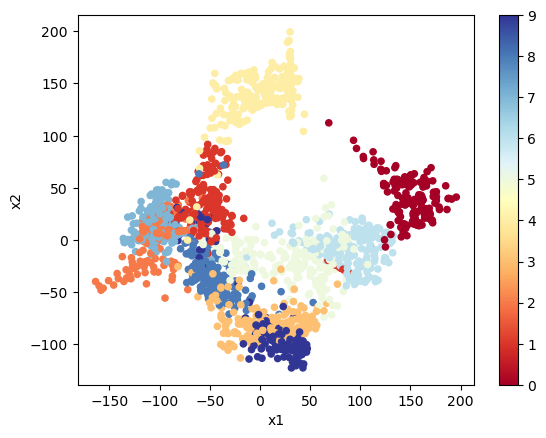

In [23]:
# Visualize the data in 2 dimensions

(pd.DataFrame(data_projected, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2', 
          c=digits.target, 
          cmap='RdYlBu'));

In [24]:
tsne = TSNE(n_components=2)
data_projected = tsne.fit_transform(digits.data)
data_projected.shape

(1797, 2)

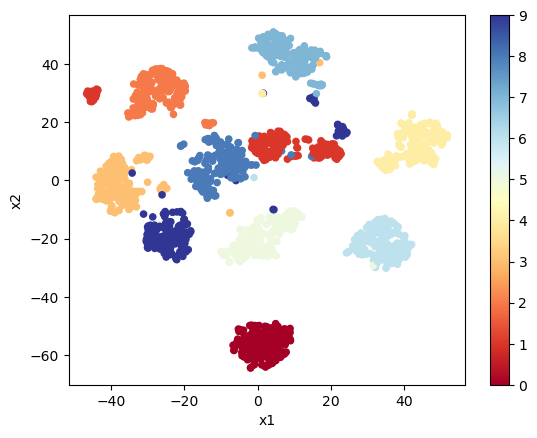

In [25]:
# Visualize the data in 2 dimensions

(pd.DataFrame(data_projected, columns=['x1', 'x2'])
 .plot
 .scatter(x='x1', y='x2', 
          c=digits.target, 
          cmap='RdYlBu'));

---
We see here that the digits are fairly well-separated in the parameter space; this tells us that a supervised classification algorithm should perform fairly well. 

Let's give it a try.

---

In [45]:
# Data Splitting
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, 
                                                digits.target, 
                                                train_size=0.85,
                                                random_state=2)

In [46]:
round(Xtrain.shape[0]/1797.0, 2)

0.85

---

Q. Which of these sets will be used for

- training a model 
    - [Xtrain, yTrain]
- finding training accuracy/error 
    - [yTrain, predicted on Xtrain]
- finding out-of-sample accuracy/error 
    - [yTest, predicted on Xtest]
    
---    

In [28]:
# 75-25 Split on the data by default

print(Xtrain.shape, Xtest.shape)

(1347, 64) (450, 64)


---
### `Logistic Regression` with Default Hyperparameters

- Model Class = `LogisticRegression` (fixed)
- Model Object = `clf` (arbitrary)
- Train Model using the `.fit()` method of the Model Object, and the X_train y_train
- Predict using the `.predict` method of the trained model on X_test to get the y_predicted
- Compare the y_test (actual) vs. y_predicted to get the model performance


```python
# create model object from class required
model = ModelClass(**hyperparams)

# fit model using input data
# X_train, y_train, X_test and y_test all come from the train_test_split of our input data
model.fit(X_train, y_train)

# y_predicted is created using the fitted model
y_predicted = model.predict(X_test)

# assess performance comparing actual (test) vs. predicted
# replace accuracy_score with other performance metrics like precision, recall etc.
accuracy_score(y_test, y_predicted)


```

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

clf = LogisticRegression(max_iter=1000)
clf.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=1000)

In [50]:
# Training Accuracy
accuracy_score(Ytrain, clf.predict(Xtrain))

1.0

In [52]:
# Test Accuracy
accuracy_score(Ytest, clf.predict(Xtest))

0.937037037037037

In [61]:
pd.Series(cross_val_score(clf, Xtest, Ytest, scoring='accuracy', cv=10)).describe()

count    10.000000
mean      0.929630
std       0.044341
min       0.851852
25%       0.898148
50%       0.925926
75%       0.962963
max       1.000000
dtype: float64

In [54]:
confusion_matrix(Ytest, clf.predict(Xtest))

array([[20,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 24,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 23,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 22,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 19]])

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(Ytest, clf.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      0.91      0.94        34
           2       1.00      1.00      1.00        24
           3       0.94      0.91      0.93        35
           4       0.96      0.85      0.90        27
           5       0.97      1.00      0.98        30
           6       1.00      0.92      0.96        24
           7       0.97      0.97      0.97        29
           8       0.73      1.00      0.84        24
           9       0.90      0.86      0.88        22

    accuracy                           0.94       270
   macro avg       0.94      0.94      0.94       270
weighted avg       0.94      0.94      0.94       270



> 
There are many ways to improve this classifier
* use a more sophisticated model, a
* apply cross validation, or 
* apply other techniques.

---
## Task 2

RE RUN THE DIGITS CLASSIFICATION USING SVM and report the accuracy for different settings of the `kernel` parameter.
'linear', 'rbf', 'poly'

---

In [63]:
from sklearn.svm import SVC

for K in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVC(kernel=K)
    clf.fit(Xtrain, Ytrain)
    print(f"For Kernel: {K} the accuracy is: {cross_val_score(clf, Xtest, Ytest, cv=10, scoring='accuracy').mean().round(2)}")

For Kernel: linear the accuracy is: 0.94
For Kernel: poly the accuracy is: 0.95
For Kernel: rbf the accuracy is: 0.94
For Kernel: sigmoid the accuracy is: 0.78


In [65]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(2, 11, 2):
    knn_obj = KNeighborsClassifier(n_neighbors=n)
    knn_obj.fit(Xtrain, Ytrain)
    ypred = knn_obj.predict(Xtest)
    print(f'For {n} neighbors, the accuracy is: {accuracy_score(Ytest, ypred):.2}')

For 2 neighbors, the accuracy is: 0.98
For 4 neighbors, the accuracy is: 0.98
For 6 neighbors, the accuracy is: 0.97
For 8 neighbors, the accuracy is: 0.97
For 10 neighbors, the accuracy is: 0.96


---
## Using GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

> Binary Classfication Problem: Performance Metrics on the Confusion Matrix

- http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
- https://en.wikipedia.org/wiki/Confusion_matrix

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
grid_tree = {
    'max_depth': [3, 6, 9, 12, 20],
    'min_samples_split': [25, 50],
    'max_features': [30, 40, 50]
}

In [79]:
gscv_tree = GridSearchCV(estimator=DecisionTreeClassifier(), 
                         param_grid=grid_tree, 
                         cv=5, 
                         scoring='accuracy')

In [84]:
y_predicted = gscv_tree.best_estimator_.predict(Xtest)

In [82]:
gscv_tree.best_score_

0.8192671166827388

In [83]:
print(classification_report(Ytest, gscv_tree.best_estimator_.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.66      0.79      0.72        34
           2       0.78      0.88      0.82        24
           3       0.84      0.74      0.79        35
           4       0.94      0.59      0.73        27
           5       0.96      0.90      0.93        30
           6       1.00      0.88      0.93        24
           7       0.85      0.76      0.80        29
           8       0.50      0.62      0.56        24
           9       0.63      0.86      0.73        22

    accuracy                           0.79       270
   macro avg       0.81      0.79      0.79       270
weighted avg       0.81      0.79      0.79       270



In [67]:
# Set the parameters by cross-validation
par_grid = {'kernel': ['poly', 'linear'], 
            'gamma': [0.0001, 0.00001], 
            'C': [1, 10, 100, 1000]}

gscv_svc = GridSearchCV(estimator=SVC(), 
                        param_grid=par_grid, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=True)

gscv_svc.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['poly', 'linear']},
             scoring='accuracy', verbose=True)

In [71]:
gscv_svc.best_estimator_

SVC(C=1, gamma=0.001, kernel='poly')

In [72]:
gscv_svc.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}

In [73]:
gscv_svc.best_score_

0.9895317689917498

In [75]:
print(classification_report(Ytest, gscv_svc.best_estimator_.predict(Xtest)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        24
           3       1.00      0.97      0.99        35
           4       0.96      0.89      0.92        27
           5       0.97      1.00      0.98        30
           6       1.00      1.00      1.00        24
           7       0.94      1.00      0.97        29
           8       0.89      1.00      0.94        24
           9       1.00      0.91      0.95        22

    accuracy                           0.97       270
   macro avg       0.98      0.97      0.97       270
weighted avg       0.98      0.97      0.97       270



In [214]:
accuracy_score(Ytrain, gscv_svc.best_estimator_.predict(Xtrain))

# An underfitted model would have a LOW TRAINING ACCURACY
# Therefore, our best model as found by GSCV is a good model that doesn't underfit.

1.0

In [215]:
accuracy_score(Ytest, gscv_svc.best_estimator_.predict(Xtest))

# An overfitted model would have much LOWER TEST ACCURACY as compared with TRAIN ACCURACY
# Here, we see that both Train and Test accuracy is high
# So our model is not Overfitting.

0.98888888888888893